1 

Visualización de datos numéricos en los datasets
_______________________________________________________________________________

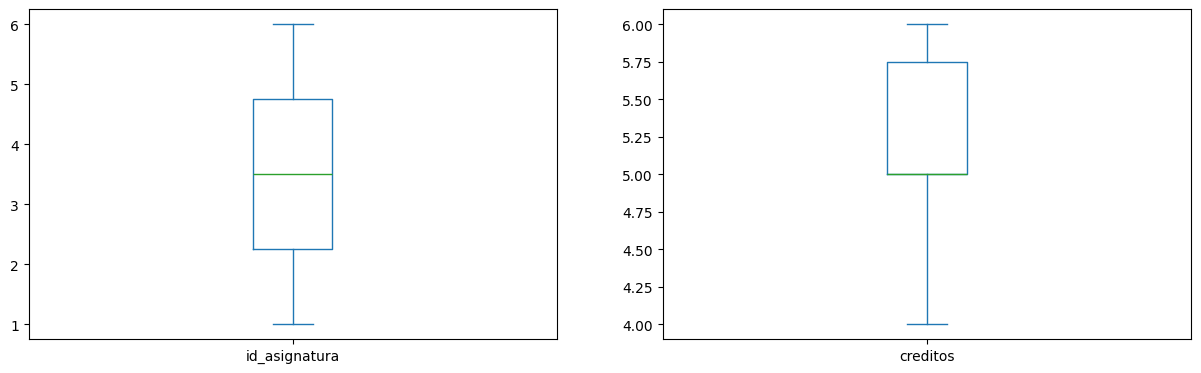

In [30]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

df_asig = pd.read_csv('../GENERADOR/asignaturas.csv')
df_est = pd.read_csv('../GENERADOR/estudiantes.csv')
df_not = pd.read_csv('../GENERADOR/notas.csv')

df_asig.plot(kind='box', subplots=True, layout=(6,2), sharex=False,sharey=False, figsize=(15,30))
plt.show()

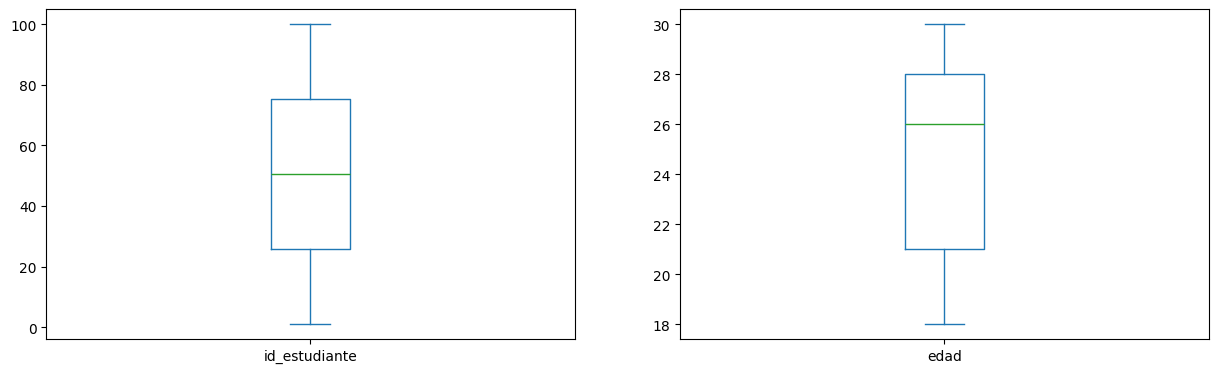

In [31]:
df_est.plot(kind='box', subplots=True, layout=(6,2), sharex=False,sharey=False, figsize=(15,30))
plt.show()

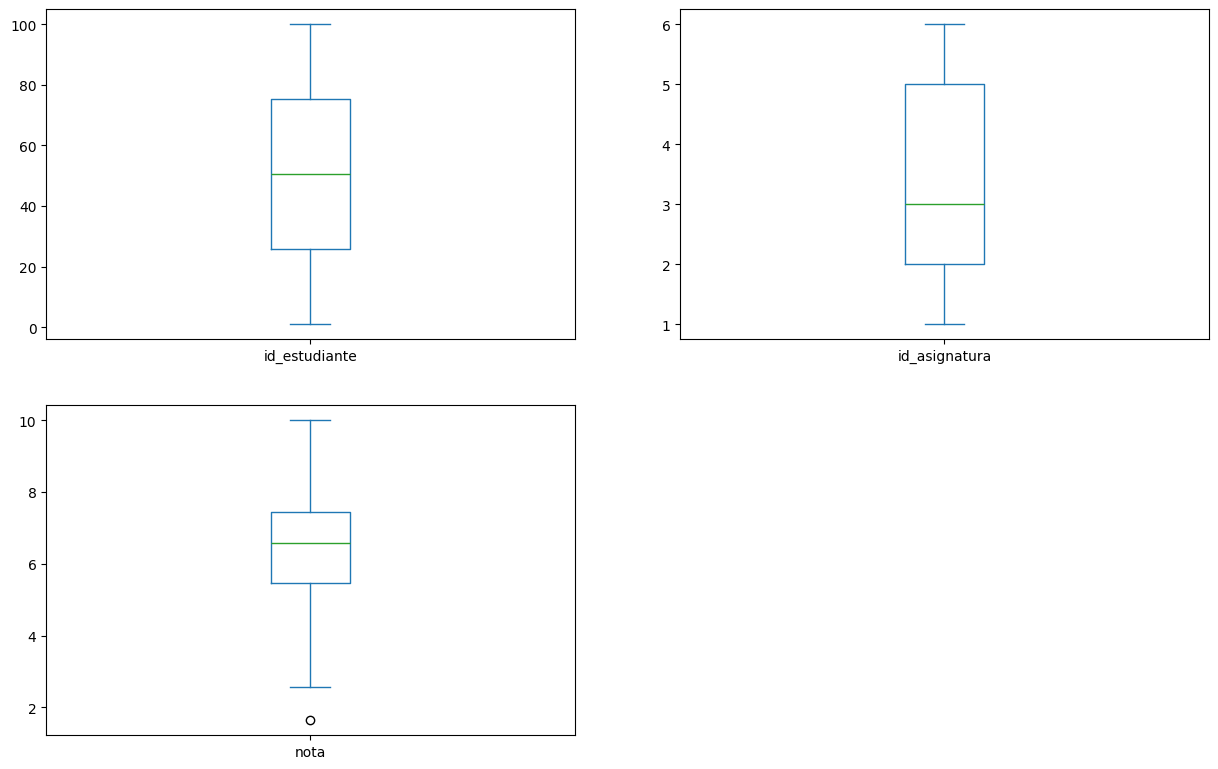

In [32]:
df_not.plot(kind='box', subplots=True, layout=(6,2), sharex=False,sharey=False, figsize=(15,30))
plt.show()

2

Visualización de datos no numéricos en los datasets
_______________________________________________________________________________

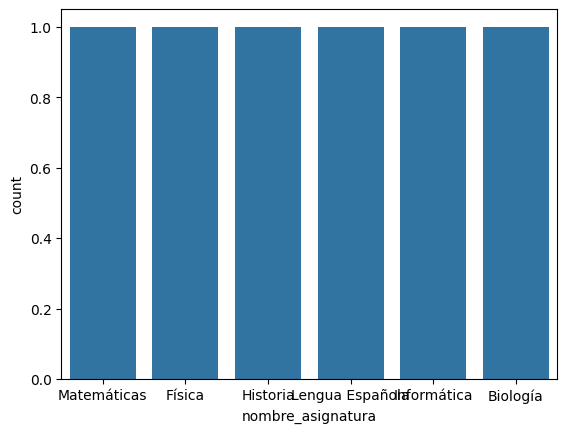

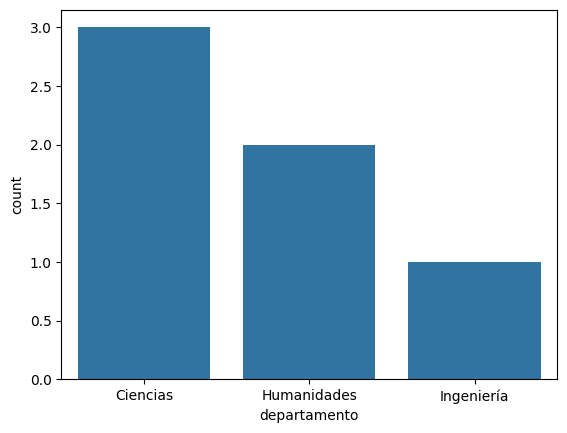

In [33]:
columnas_object = df_asig.select_dtypes(include='object')
for columna in columnas_object:
    sns.countplot(x=columna, data=df_asig, palette=None)
    plt.show()

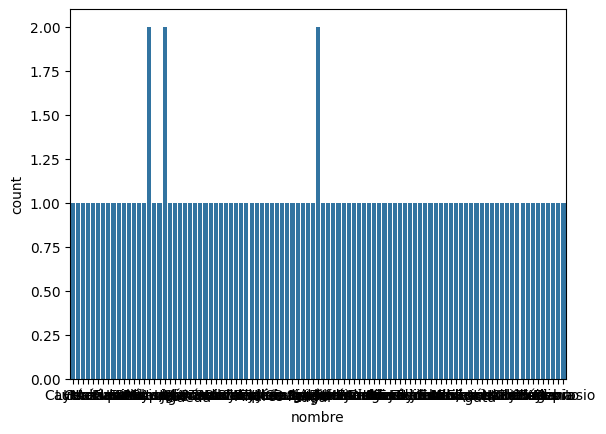

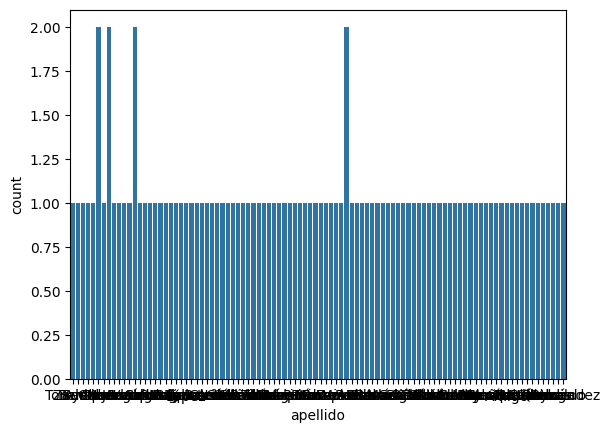

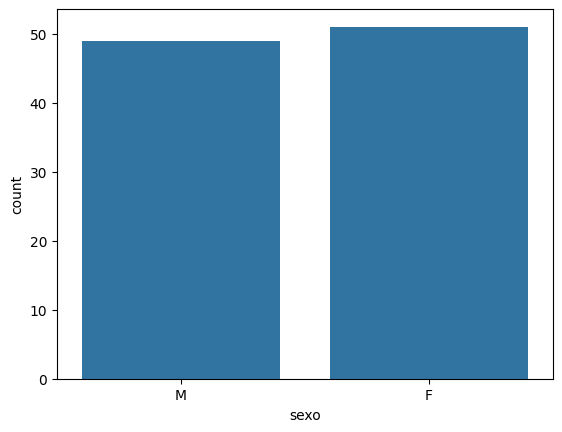

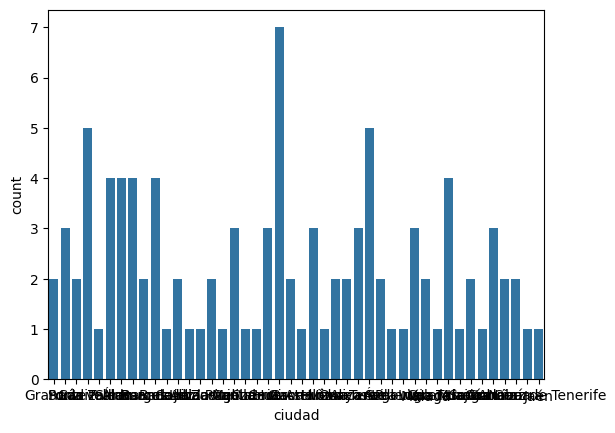

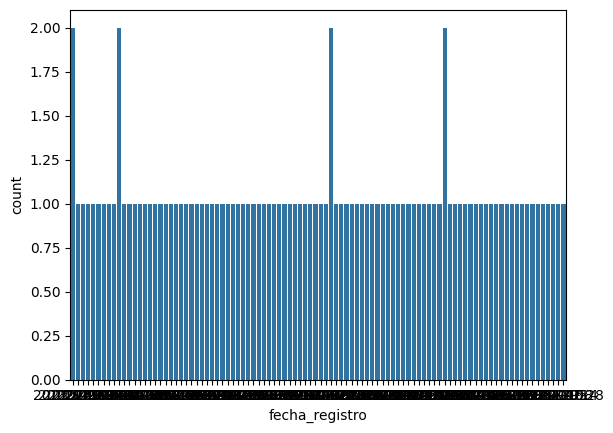

In [34]:
columnas_object = df_est.select_dtypes(include='object')
for columna in columnas_object:
    sns.countplot(x=columna, data=df_est, palette=None)
    plt.show()

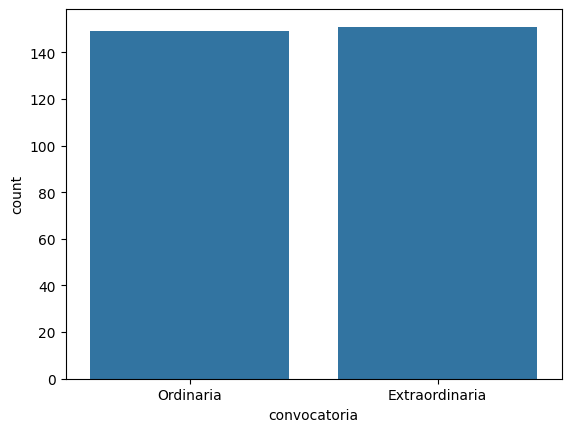

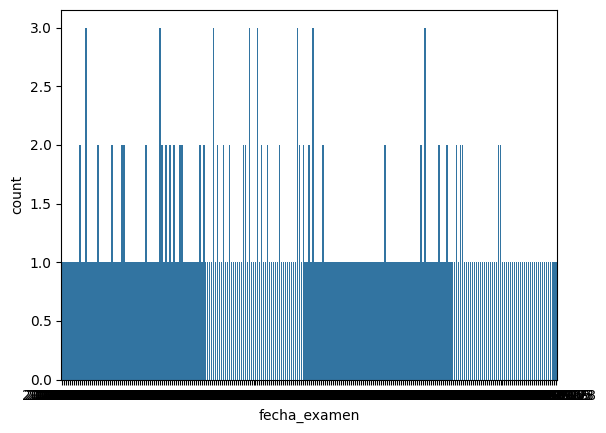

In [35]:
columnas_object = df_not.select_dtypes(include='object')
for columna in columnas_object:
    sns.countplot(x=columna, data=df_not, palette=None)
    plt.show()